<a href="https://colab.research.google.com/github/Anant-agarwal123/Perfect-Roadmap-To-Learn-Data-Science-In-2024/blob/main/big_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
image_folder_path = "/content/drive/MyDrive/big cat classifier"
list_of_folders = os.listdir("/content/drive/MyDrive/big cat classifier")
list_of_folders

['jaguar',
 'tiger',
 'cat',
 'leopard',
 'puma',
 'lion',
 'cheetah',
 'black panther']

In [4]:
images_path_list = []
label_list = []
for folder in list_of_folders:
    folder_path = os.path.join(image_folder_path,folder)
    images = os.listdir(folder_path)
    for image in images:
        image_path = os.path.join(folder_path,image)
        images_path_list.append(image_path)
        label_list.append(folder)

In [5]:
len(images_path_list)

819

In [6]:
len(label_list)

819

In [7]:
images_path_list = np.array(images_path_list)
label_list = np.array(label_list)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x, x_test, y, y_test = train_test_split(images_path_list, label_list, test_size = 0.05)
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.15)

In [10]:
len(x_train)

661

In [11]:
len(x_cv)

117

In [12]:
len(x_test)

41

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
from keras.utils import to_categorical

In [15]:
ordinal_encoder = OrdinalEncoder()
y_list = label_list.copy()
#y_list

In [16]:
y_list = ordinal_encoder.fit_transform(y_list.reshape(-1,1))
#y_list

In [17]:
y_list.reshape(819)

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       1., 1., 1., 1., 1.

In [18]:
y_list = to_categorical(y_list, num_classes=8)
y_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
def from_simple_array_to_categorical(arr):
    arr=ordinal_encoder.transform(arr.reshape(-1,1))
    arr.reshape(len(arr))
    arr = to_categorical(arr, num_classes=8)
    return arr

In [20]:
y_train = from_simple_array_to_categorical(y_train)
y_cv = from_simple_array_to_categorical(y_cv)
y_test = from_simple_array_to_categorical(y_test)

In [21]:
type(y_train)

numpy.ndarray

In [22]:
X_train = []
for imagepath in x_train:
  img = cv.imread(imagepath)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img = cv.resize(img, (180,180))
  X_train.append(img)

In [ ]:
#X_train2 = [cv.resize(cv.cvtColor(cv.imread(image_path),cv.COLOR_BGR2RGB), (180,180)) for image_path in x_train]

In [ ]:
#X_cv2 = [cv.resize(cv.cvtColor(cv.imread(image_path),cv.COLOR_BGR2RGB), (180,180)) for image_path in x_cv]

In [23]:
X_cv = []
for imagepath in x_cv:
  img = cv.imread(imagepath)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img = cv.resize(img, (180,180))
  X_cv.append(img)    ### yaha glti ho gyi hai bhai smbhlke

In [24]:
#x_cv = [cv.imread(image_path) for image_path in x_cv]
X_test = [cv.resize(cv.cvtColor(cv.imread(image_path),cv.COLOR_BGR2RGB), (180,180)) for image_path in x_test]

In [25]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_cv = np.array(X_cv)

In [ ]:
#X_cv = X_train[661:]

In [ ]:
#len(X_cv)

117

In [ ]:
#X_train = X_train[:661]
#len(X_train)

661

array([[[172, 154,  54],
        [173, 155,  55],
        [177, 159,  57],
        ...,
        [148, 142,  71],
        [146, 146,  74],
        [149, 149,  77]],

       [[169, 151,  51],
        [171, 153,  53],
        [174, 156,  55],
        ...,
        [145, 139,  69],
        [144, 144,  72],
        [146, 146,  74]],

       [[167, 149,  49],
        [168, 150,  50],
        [172, 154,  52],
        ...,
        [142, 136,  66],
        [143, 140,  69],
        [145, 142,  71]],

       ...,

       [[235, 214, 167],
        [233, 212, 165],
        [229, 210, 162],
        ...,
        [174, 177, 113],
        [172, 176, 115],
        [175, 179, 118]],

       [[235, 214, 167],
        [233, 212, 165],
        [229, 210, 162],
        ...,
        [173, 176, 112],
        [168, 172, 111],
        [173, 177, 116]],

       [[235, 214, 167],
        [233, 212, 165],
        [229, 210, 162],
        ...,
        [172, 175, 111],
        [167, 171, 110],
        [173, 177, 116]]], dtype=uint8)
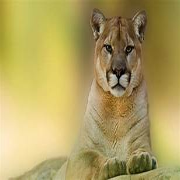

In [26]:
X_train[660]

array([[[45, 57, 53],
        [42, 54, 50],
        [40, 52, 48],
        ...,
        [60, 68, 81],
        [61, 69, 82],
        [62, 70, 83]],

       [[44, 56, 52],
        [42, 54, 50],
        [40, 52, 48],
        ...,
        [60, 68, 81],
        [60, 68, 81],
        [61, 69, 82]],

       [[44, 56, 52],
        [42, 54, 50],
        [39, 51, 47],
        ...,
        [59, 67, 80],
        [60, 68, 81],
        [61, 69, 82]],

       ...,

       [[77, 86, 69],
        [57, 66, 49],
        [61, 70, 53],
        ...,
        [37, 44, 37],
        [30, 37, 30],
        [27, 33, 29]],

       [[80, 89, 72],
        [59, 68, 51],
        [53, 62, 45],
        ...,
        [30, 37, 30],
        [24, 31, 24],
        [32, 38, 34]],

       [[81, 90, 73],
        [61, 70, 53],
        [53, 62, 45],
        ...,
        [25, 32, 25],
        [23, 30, 23],
        [44, 50, 46]]], dtype=uint8)
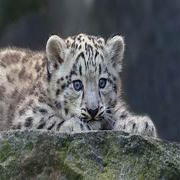

In [27]:
X_cv[116]

In [28]:
y_cv[116]

array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

array([[[ 16,  18,  15],
        [ 16,  18,  15],
        [ 15,  17,  14],
        ...,
        [ 46,  27,  23],
        [ 45,  26,  20],
        [ 44,  27,  20]],

       [[ 16,  18,  15],
        [ 15,  17,  14],
        [ 15,  17,  12],
        ...,
        [ 47,  26,  23],
        [ 45,  26,  20],
        [ 44,  27,  20]],

       [[ 17,  18,  13],
        [ 17,  18,  13],
        [ 16,  17,  12],
        ...,
        [ 47,  26,  21],
        [ 45,  26,  20],
        [ 45,  26,  20]],

       ...,

       [[ 93,  52,  22],
        [113,  73,  45],
        [119,  79,  53],
        ...,
        [114,  54,  20],
        [134,  76,  44],
        [126,  70,  37]],

       [[101,  60,  30],
        [113,  73,  45],
        [108,  68,  42],
        ...,
        [113,  53,  18],
        [126,  68,  36],
        [118,  61,  31]],

       [[ 97,  56,  26],
        [104,  64,  37],
        [ 92,  52,  26],
        ...,
        [114,  54,  19],
        [135,  76,  45],
        [125,  68,  38]]], dtype=uint8)
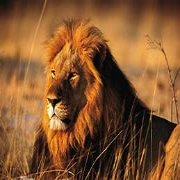

In [29]:
X_test[40]

In [30]:
y_test[40]

array([0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [31]:
X_train = X_train/255
X_cv = X_cv/255
X_test = X_test/255

(180, 180, 3)

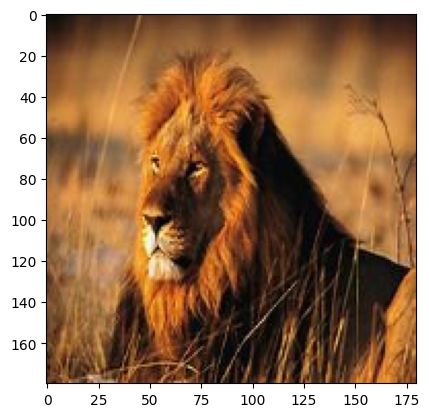

In [32]:
plt.imshow(X_test[40])
X_test[40].shape

In [33]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import Sequential, layers

In [106]:
#base_model = keras.applications.VGG19(include_top=False, weights="imagenet", pooling= "max", classifier_activation="relu")

80134624/80134624 [==============================] - 4s 0us/step


In [34]:
# base_model = keras.applications.MobileNetV2(
#     alpha=1.3,
#     include_top=False,
#     weights="imagenet",
#     pooling="max",
#     classifier_activation="relu",
# )

15441408/15441408 [==============================] - 1s 0us/step


In [120]:
base_model = keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classifier_activation="relu",
)

219055592/219055592 [==============================] - 11s 0us/step


In [113]:
#base_model.trainable = True

In [124]:
big_cat_classifier_model = Sequential([
    #base_model,
    # layers.RandomFlip("horizontal"),
    # layers.RandomRotation(0.3),
    # layers.RandomContrast(0.05),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    # layers.MaxPooling2D(padding="same"),
    layers.BatchNormalization(),
    base_model,
    #layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    #layers.MaxPooling2D(padding="same"),
    layers.Flatten(),
    #layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    #layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(8, activation="softmax"),
])

In [125]:
big_cat_classifier_model.compile(optimizer="adamax",
    loss = "categorical_crossentropy",
    metrics=["accuracy"])

In [126]:
history = big_cat_classifier_model.fit(X_train,y_train,epochs=25,validation_data=(X_cv,y_cv))

Epoch 1/25
21/21 [==============================] - 86s 590ms/step - loss: 1.0036 - accuracy: 0.7247 - val_loss: 110.8847 - val_accuracy: 0.2564
Epoch 2/25
21/21 [==============================] - 8s 383ms/step - loss: 0.5847 - accuracy: 0.9107 - val_loss: 67.8779 - val_accuracy: 0.4615
Epoch 3/25
21/21 [==============================] - 8s 378ms/step - loss: 0.4439 - accuracy: 0.9486 - val_loss: 17.0014 - val_accuracy: 0.4957
Epoch 4/25
21/21 [==============================] - 8s 387ms/step - loss: 0.3279 - accuracy: 0.9713 - val_loss: 3.1667 - val_accuracy: 0.6068
Epoch 5/25
21/21 [==============================] - 8s 389ms/step - loss: 0.3325 - accuracy: 0.9592 - val_loss: 1.8240 - val_accuracy: 0.7094
Epoch 6/25
21/21 [==============================] - 8s 383ms/step - loss: 0.2621 - accuracy: 0.9743 - val_loss: 0.8348 - val_accuracy: 0.8632
Epoch 7/25
21/21 [==============================] - 8s 390ms/step - loss: 0.2091 - accuracy: 0.9864 - val_loss: 0.7527 - val_accuracy: 0.8632
E

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
big_cat_classifier_model.save("/content/drive/MyDrive/model/big_cat_classifier.keras")

In [129]:
predictions = big_cat_classifier_model.predict(X_test)

2/2 [==============================] - 6s 2s/step


In [130]:
final_predictions = np.zeros(shape=(41,8))
i = 0
for prediction in predictions:
    arg = np.argmax(prediction)
    final_predictions[i][arg]=1
    i=i+1

In [131]:
accuracy = accuracy_score(final_predictions, y_test)
accuracy*100

92.6829268292683

In [168]:
cat_image = cv.imread("/content/cat.jpg")

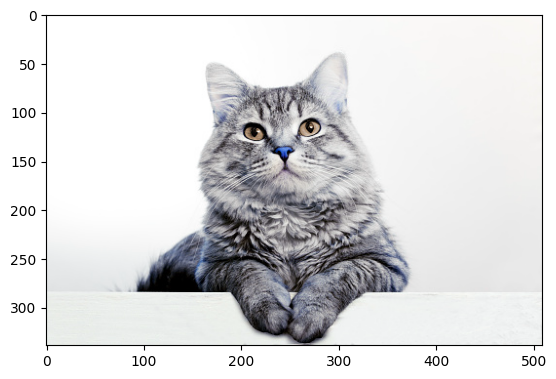

In [169]:
plt.imshow(cat_image)

In [170]:
cat_image = cv.resize(cat_image, (180,180))
cat_image = cv.cvtColor(cat_image, cv.COLOR_BGR2RGB)
cat_image = cat_image/255

In [171]:
big_cat_classifier_model.predict(np.array([cat_image]))

1/1 [==============================] - 0s 41ms/step


array([[1.5596054e-03, 9.9209267e-01, 2.0167017e-03, 6.9631694e-04,
        5.1425101e-04, 1.9324429e-03, 8.7514427e-04, 3.1286440e-04]],
      dtype=float32)